In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

In [225]:
train_data = pd.read_csv('ML_Artivatic_dataset/train_indessa.csv')
train_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [226]:
test_data = pd.read_csv('ML_Artivatic_dataset/test_indessa.csv')
test_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [227]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

# Data Cleaning

In [228]:
# Defining a function to give the number of NaN values in columns having more than one NaN value

def column_nan_check(data):
    count_nans = data.isnull().sum()
    count_nans = count_nans[count_nans>0]
    percent_nans = count_nans/len(data)*100
    columns_with_nans = count_nans.index.tolist()
    df_nans = pd.DataFrame({'Count': count_nans, 'Percent': percent_nans}, index=columns_with_nans)
    df_nans = df_nans.sort_values('Count', ascending=False)
    return df_nans

In [229]:
# Checking the percentage of NaN values in train_data cloumns having more than one NaN value

train_nans = column_nan_check(train_data)
train_nans

,Count,Percent
verification_status_joint,532123,99.942715
desc,456829,85.801085
mths_since_last_record,450305,84.575755
mths_since_last_major_derog,399448,75.023853
mths_since_last_delinq,272554,51.190771
batch_enrolled,85149,15.992585
tot_cur_bal,42004,7.889142
tot_coll_amt,42004,7.889142
total_rev_hi_lim,42004,7.889142
emp_title,30833,5.791018


In [230]:
test_nans = column_nan_check(test_data)
test_nans

,Count,Percent
verification_status_joint,354745,99.941964
desc,304770,85.862556
mths_since_last_record,300021,84.524625
mths_since_last_major_derog,266228,75.004156
mths_since_last_delinq,181758,51.206505
batch_enrolled,45599,12.846562
tot_cur_bal,28272,7.965043
tot_coll_amt,28272,7.965043
total_rev_hi_lim,28272,7.965043
emp_title,20629,5.811788


In [231]:
# Inspecting the columns having percentage of NaN values more than 50%

cols = train_nans[train_nans['Percent'] > 50].index.tolist()

for col in cols:
    print(col + ': ')
    print(train_data[col].unique())
    print('\n')

verification_status_joint: 
[nan 'Verified' 'Not Verified' 'Source Verified']


desc: 
[nan
 '> My goal is to obtain a loan to pay off my high credit cards and get out of debt within 3 years.<br>'
 '   > We are requesting this loan to help re-organize our finances after having a tumultuous year that resulted in unexpected medical bills.  I have been in the same line of work for over five years and have been at my current company, which is very stable in the marketplace, for two and a half years.<br>'
 ...
 '   > This loan is for home improvements, remodeling and updating.<br>'
 'Need to consolidate cards to 1 monthly payment.'
 '   > My Deck needs to be replaced. I have $2500 saved up for it, but want to get it installed over the summer. The rates at lending club were worth getting financing for it instead of waiting till I could pay for it outright. <br/>Since leaving grad school I have never been unemployed. My Job requires a security clearance, which I cannot have with a poor credit

In [232]:
# All these columns have too many null values and the NaN values do not represent anything meaningful. 
# For the 'verification_status_joint' column the NaN values represent indiviadual accounts, 
# but there is too little data, about the categories in this column
# So it's better to delete those columns.

train_data = train_data.drop(columns=cols)
test_data = test_data.drop(columns=cols)

In [233]:
# Inspecting columns with NaN percentages between 5 and 16

cols = train_nans[(train_nans['Percent'] > 5) & (train_nans['Percent'] < 16)].index.tolist()

for col in cols:
    print(col + ': ')
    print(train_data[col].unique())
    print('\n')

batch_enrolled: 
[' ' 'BAT1586599' 'BAT4808022' 'BAT2833642' 'BAT2575549' nan 'BAT4136152'
 'BAT4694572' 'BAT5924421' 'BAT3193689' 'BAT224923' 'BAT1184694'
 'BAT1930365' 'BAT3873588' 'BAT2252229' 'BAT1135695' 'BAT4271519'
 'BAT3726927' 'BAT2803411' 'BAT1104812' 'BAT5341619' 'BAT3865626'
 'BAT1780517' 'BAT2522922' 'BAT2558388' 'BAT2428731' 'BAT3943761'
 'BAT2333412' 'BAT5849876' 'BAT5540558' 'BAT2136391' 'BAT1761981'
 'BAT47674' 'BAT1327206' 'BAT1467036' 'BAT2003848' 'BAT4722912'
 'BAT4201183' 'BAT5525466' 'BAT5489674' 'BAT2078974' 'BAT4351734'
 'BAT2677031' 'BAT3461431' 'BAT3292317' 'BAT1766061' 'BAT1914408'
 'BAT1942645' 'BAT5458862' 'BAT2015867' 'BAT1691418' 'BAT5877328'
 'BAT5614983' 'BAT1755192' 'BAT4786748' 'BAT5811547' 'BAT2881062'
 'BAT4051248' 'BAT5629144' 'BAT5714674' 'BAT3372536' 'BAT1273836'
 'BAT3260421' 'BAT2881453' 'BAT5320519' 'BAT5547201' 'BAT5046385'
 'BAT348786' 'BAT3160077' 'BAT20678' 'BAT4260473' 'BAT3706046'
 'BAT4780022' 'BAT3275209' 'BAT3518025' 'BAT3839056' 'BAT

In [234]:
# 'batch_enrolled' column has many NaN values and has too many categories. 

train_data = train_data.drop(columns=['batch_enrolled'])
test_data = test_data.drop(columns=['batch_enrolled'])

In [235]:
train_data['emp_title'].nunique()

190124

In [236]:
# 'emp_title' column has too many NaNs and too many unique values

train_data = train_data.drop(columns=['emp_title'])
test_data = test_data.drop(columns=['emp_title'])

In [237]:
# Processing the 'emp_length' column

k = train_data['emp_length'].replace('< 1 year', '0')
train_data['emp_length'] = k.str.extract('(\d+)').astype('float')

k = test_data['emp_length'].replace('< 1 year', '0')
test_data['emp_length'] = k.str.extract('(\d+)').astype('float')

In [238]:
# Replacing the NaNs with with the category having max examples

emp_length_mode = train_data['emp_length'].mode()[0]

train_data['emp_length'] = train_data['emp_length'].fillna(emp_length_mode)
test_data['emp_length'] = test_data['emp_length'].fillna(emp_length_mode)

In [239]:
cols = ['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim']
df = train_data[cols]
rows_with_NaN = df[df.isnull().any(axis=1)]
len(rows_with_NaN) - train_nans.loc['total_rev_hi_lim']['Count']

0.0

In [240]:
train_data['tot_coll_amt'].value_counts().iloc[:5]/len(train_data)*100

0.0      79.053506
50.0      0.197773
100.0     0.153072
75.0      0.118514
150.0     0.078508
Name: tot_coll_amt, dtype: float64

In [241]:
# Almost 80% of the values in 'tot_coll_amt' are zeros

train_data['tot_coll_amt'] = train_data['tot_coll_amt'].fillna(0)
test_data['tot_coll_amt'] = test_data['tot_coll_amt'].fillna(0)

In [242]:
# Replacing the NaNs with means for the rest of the two columns

tot_cur_bal_median = train_data['tot_cur_bal'].mean()
train_data['tot_cur_bal'] = train_data['tot_cur_bal'].fillna(tot_cur_bal_median)
test_data['tot_cur_bal'] = test_data['tot_cur_bal'].fillna(tot_cur_bal_median)

total_rev_hi_lim_median = train_data['total_rev_hi_lim'].mean()
train_data['total_rev_hi_lim'] = train_data['total_rev_hi_lim'].fillna(total_rev_hi_lim_median)
test_data['total_rev_hi_lim'] = test_data['total_rev_hi_lim'].fillna(total_rev_hi_lim_median)

In [243]:
# Inspecting the columns having percentage of NaN values less than 5%

cols = train_nans[train_nans['Percent'] < 5].index.tolist()

for col in cols:
    print(col + ': ')
    print(train_data[col].unique())
    print('\n')

revol_util: 
[ 73.1   23.2   31.2  ... 121.1  114.7    0.83]


collections_12_mths_ex_med: 
[ 0.  1.  2.  3. nan  4. 16.  5.  7. 14.]


title: 
['Debt consolidation' 'Home improvement' 'refi' ... 'Relieve Stress'
 'Great Credit' 'Loan for Deck']


inq_last_6mths: 
[ 1.  0.  2.  5.  3.  4.  6.  7. 11.  8.  9. 10. 12. 28. 17. 14. 24. nan
 15. 20. 16. 13. 31. 18.]


pub_rec: 
[ 1.  0.  2.  3.  5.  4.  6.  7. 10.  8. 12.  9. 28. 21. 11. 13. 16. 17.
 nan 20. 23. 49. 63. 14. 15. 40. 18. 22. 86.]


total_acc: 
[ 28.  13.  19.  21.  27.  30.  23.  49.  32.  31.  39.  17.  24.  35.
  25.   9.  34.  14.  18.  12.   5.  37.  48.  38.  55.  29.  36.  51.
  11.   8.  47.  10.  15.  20.  63.  22.  16.  40.  43.  59.  41.  26.
   4.   7.  58.  52.  42.  33.  44.  57.  54.  53.  45.   6.  62.  60.
  50.  61.  68.  46.  56.  85.  70.   3.  73.  72.  77.  82.  78.  94.
  66.  86.  65.  67.  64.  79.  80.  69.  71.  81. 110.  96.  74. 112.
  75.  87.  97.  90.  76.  89.  84.   2.  91.  95.  92. 104. 102.

In [244]:
# 'title' has too many categories

train_data.drop(columns=['title'], inplace=True)
test_data.drop(columns=['title'], inplace=True)

In [245]:
# Replacing the NaNs with modes for the following columns

cols = ['collections_12_mths_ex_med', 'inq_last_6mths', 'pub_rec', 'delinq_2yrs', 'acc_now_delinq']

for col in cols:
    mode = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode)
    test_data[col] = test_data[col].fillna(mode)

In [246]:
# Replacing the NaNs with medians for the following columns

cols = ['open_acc', 'total_acc', 'annual_inc', 'revol_util']

for col in cols:
    median = train_data[col].median()
    train_data[col] = train_data[col].fillna(median)
    test_data[col] = test_data[col].fillna(median)

In [247]:
column_nan_check(train_data)

,Count,Percent


In [248]:
column_nan_check(test_data)

,Count,Percent


# Data Wrangling

In [249]:
continuous_features = []
categorical_features = []
ordinal_features = []

In [250]:
object_df = train_data.select_dtypes('object')
object_df.head()

,term,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,E,E3,OWN,Source Verified,n,debt_consolidation,349xx,FL,f,INDIVIDUAL,26th week
1,36 months,B,B4,MORTGAGE,Source Verified,n,home_improvement,209xx,MD,w,INDIVIDUAL,9th week
2,36 months,A,A4,OWN,Not Verified,n,debt_consolidation,447xx,OH,w,INDIVIDUAL,9th week
3,36 months,D,D5,RENT,Not Verified,n,debt_consolidation,221xx,VA,f,INDIVIDUAL,135th week
4,36 months,B,B2,RENT,Verified,n,credit_card,900xx,CA,w,INDIVIDUAL,96th week


In [251]:
object_df.nunique()

term                     2
grade                    7
sub_grade               35
home_ownership           6
verification_status      3
pymnt_plan               2
purpose                 14
zip_code               917
addr_state              51
initial_list_status      2
application_type         2
last_week_pay           98
dtype: int64

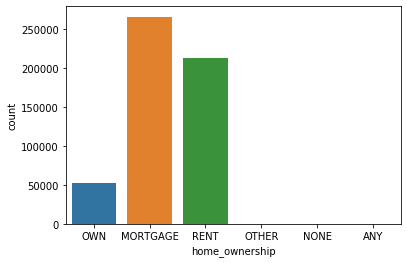

In [252]:
sns.countplot('home_ownership', data=train_data)

In [253]:
# Replacing the three categories having very less samples with the mode

home_ownership_to_replace = ['OTHER', 'NONE', 'ANY']
home_ownership_replace_with = train_data['home_ownership'].mode()[0]

train_data['home_ownership'] = train_data['home_ownership'].replace(home_ownership_to_replace, home_ownership_replace_with)
test_data['home_ownership'] = test_data['home_ownership'].replace(home_ownership_to_replace, home_ownership_replace_with)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

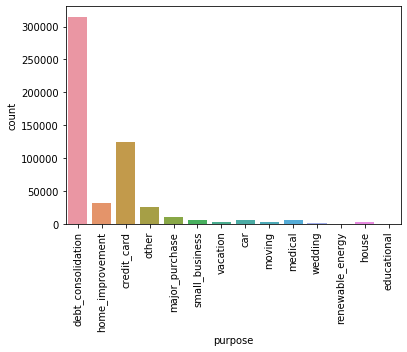

In [254]:
sns.countplot('purpose', data=train_data)
plt.xticks(rotation=90)

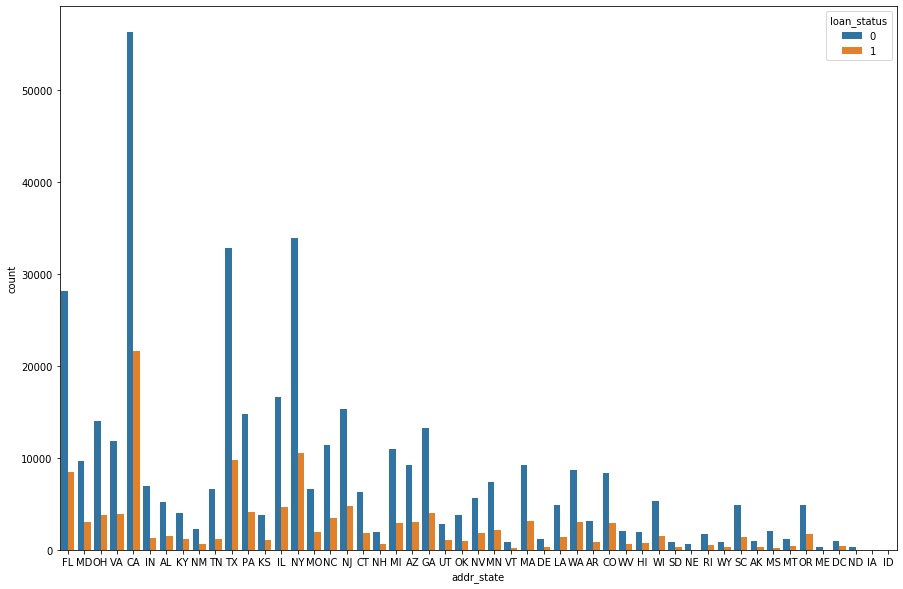

In [255]:
fig = plt.figure(figsize=(15,10))
sns.countplot('addr_state', data=train_data, hue='loan_status')

In [256]:
# Zip code has too many categories

train_data = train_data.drop(columns=['zip_code'])
test_data = test_data.drop(columns=['zip_code'])

In [257]:
train_data['last_week_pay'].unique()

array(['26th week', '9th week', '135th week', '96th week', '113th week',
       '117th week', '78th week', '44th week', '52th week', '95th week',
       '48th week', '82th week', '35th week', '104th week', '17th week',
       '13th week', 'NAth week', '31th week', '30th week', '70th week',
       '4th week', '91th week', '65th week', '39th week', '83th week',
       '74th week', '22th week', '61th week', '156th week', '122th week',
       '174th week', '87th week', '139th week', '0th week', '57th week',
       '131th week', '152th week', '43th week', '161th week', '56th week',
       '170th week', '157th week', '109th week', '126th week',
       '100th week', '148th week', '265th week', '165th week',
       '261th week', '213th week', '222th week', '196th week',
       '130th week', '144th week', '244th week', '204th week',
       '69th week', '217th week', '143th week', '191th week', '21th week',
       '226th week', '18th week', '108th week', '79th week', '183th week',
       '178th 

In [258]:
# Extracting the numbers from 'last_week_pay' column

train_data['last_week_pay'] = train_data['last_week_pay'].str.extract('(\d+)').astype('float')
test_data['last_week_pay'] = test_data['last_week_pay'].str.extract('(\d+)').astype('float')

In [259]:
train_data['last_week_pay'].isnull().any()

True

In [260]:
# 'last_week_pay' has null values beacuse of 'NAth week'
# Replacing NaNs with the median value

last_week_pay_median = train_data['last_week_pay'].median()
train_data['last_week_pay'] = train_data['last_week_pay'].fillna(last_week_pay_median)
test_data['last_week_pay'] = test_data['last_week_pay'].fillna(last_week_pay_median)

In [261]:
train_data['grade'].unique()

array(['E', 'B', 'A', 'D', 'C', 'F', 'G'], dtype=object)

In [262]:
train_data['sub_grade'].unique()

array(['E3', 'B4', 'A4', 'D5', 'B2', 'A5', 'B1', 'C4', 'D4', 'C3', 'D2',
       'A3', 'A1', 'C1', 'D1', 'E2', 'B3', 'A2', 'C2', 'C5', 'E4', 'D3',
       'B5', 'F2', 'F5', 'E1', 'E5', 'F4', 'F1', 'F3', 'G4', 'G3', 'G5',
       'G1', 'G2'], dtype=object)

In [265]:
# Converting these ratings to numbers

train_data['sub_grade'] = train_data['sub_grade'].str.extract('(\d+)').astype('int')
train_data['grade'] = train_data['grade'].replace({'A':30, 'B':25, 'C':20, 'D':15, 'E':10, 'F':5, 'G':0})
train_data['sub_grade'] = train_data['sub_grade'].replace({1:5, 2:4, 3:3, 4:2, 5:1})
train_data['grade'] = train_data['grade'] + train_data['sub_grade']
train_data = train_data.drop(columns=['sub_grade'])

In [267]:
test_data['sub_grade'] = test_data['sub_grade'].str.extract('(\d+)').astype('int')
test_data['grade'] = test_data['grade'].replace({'A':30, 'B':25, 'C':20, 'D':15, 'E':10, 'F':5, 'G':0})
test_data['sub_grade'] = test_data['sub_grade'].replace({1:5, 2:4, 3:3, 4:2, 5:1})
test_data['grade'] = test_data['grade'] + test_data['sub_grade']
test_data = test_data.drop(columns=['sub_grade'])

In [269]:
categorical_features.extend(['term', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
                             'addr_state', 'initial_list_status', 'application_type'])

In [270]:
float_df = train_data.select_dtypes('float64')
float_df.head()

,funded_amnt_inv,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350.0,19.19,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,...,1173.84,0.0,0.0,0.0,0.0,26.0,0.0,0.0,28699.0,30800.0
1,4800.0,10.99,0.0,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,...,83.95,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9974.0,32900.0
2,10000.0,7.26,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,...,56.47,0.0,0.0,0.0,0.0,9.0,0.0,65.0,38295.0,34900.0
3,15000.0,19.72,10.0,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,...,4858.62,0.0,0.0,0.0,0.0,135.0,0.0,0.0,55564.0,24700.0
4,16000.0,10.64,10.0,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,...,2296.41,0.0,0.0,0.0,0.0,96.0,0.0,0.0,47159.0,47033.0


In [271]:
float_df_nunique = float_df.nunique()
float_df_nunique

funded_amnt_inv                 6442
int_rate                         535
emp_length                        11
annual_inc                     33988
dti                             4058
delinq_2yrs                       26
inq_last_6mths                    23
open_acc                          73
pub_rec                           28
revol_bal                      63459
revol_util                      1265
total_acc                        126
total_rec_int                 243149
total_rec_late_fee              4073
recoveries                     14024
collection_recovery_fee        12617
collections_12_mths_ex_med         9
last_week_pay                     97
acc_now_delinq                     8
tot_coll_amt                    8081
tot_cur_bal                   251641
total_rev_hi_lim               14698
dtype: int64

In [272]:
cols = float_df_nunique[float_df_nunique<130].index
train_data[cols] = train_data[cols].astype('int64')
test_data[cols] = test_data[cols].astype('int64')

In [273]:
int_df = train_data.select_dtypes('int64')
int_df.head()

,member_id,loan_amnt,funded_amnt,grade,emp_length,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,loan_status
0,58189336,14350,14350,13,9,0,1,14,1,28,0,26,0,0
1,70011223,4800,4800,27,0,0,1,6,0,13,0,9,0,0
2,70255675,10000,10000,32,2,0,0,5,0,19,0,9,0,0
3,1893936,15000,15000,16,10,0,2,10,0,21,0,135,0,0
4,7652106,16000,16000,29,10,0,0,11,0,27,0,96,0,0


In [274]:
train_data = train_data.drop(columns=['member_id'])
test_data = test_data.drop(columns=['member_id'])

In [275]:
cols = int_df.columns

In [276]:
cols

Index(['member_id', 'loan_amnt', 'funded_amnt', 'grade', 'emp_length',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc',
       'collections_12_mths_ex_med', 'last_week_pay', 'acc_now_delinq',
       'loan_status'],
      dtype='object')

In [277]:
continuous_features.extend(['loan_amnt', 'funded_amnt', 'open_acc', 'total_acc', 'last_week_pay'])

In [278]:
ordinal_features.extend(['grade', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 
                         'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq'])

In [279]:
float_df = train_data.select_dtypes('float64')
continuous_features.extend(float_df.columns)

# EDA

In [280]:
target = 'loan_status'

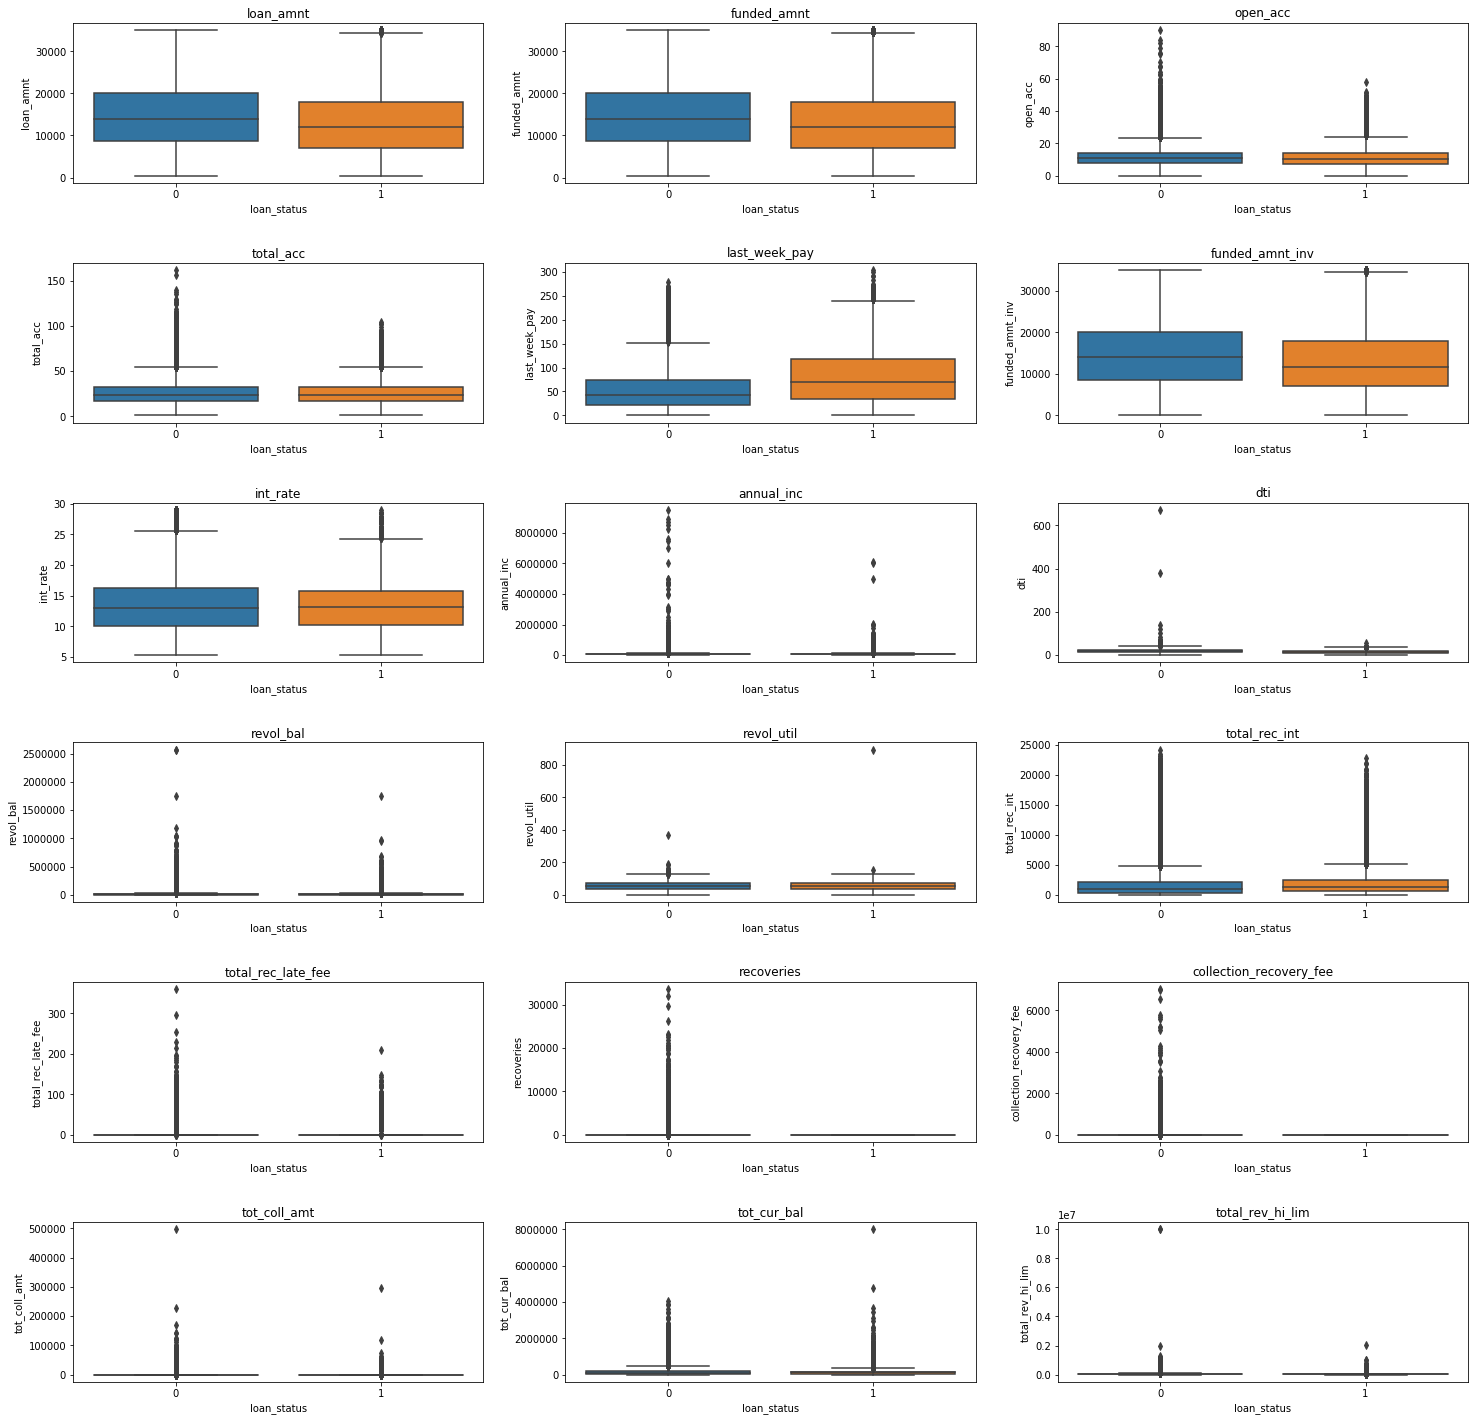

In [281]:
fig, axes = plt.subplots(6, 3, figsize=(25, 25))
for idx, (col, ax) in enumerate(zip(continuous_features, axes.flatten())):
    sns.boxplot(x=target, y=col, data=train_data, ax=ax)
    ax.set_title(col)
    plt.subplots_adjust(wspace=.2, hspace=.5)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

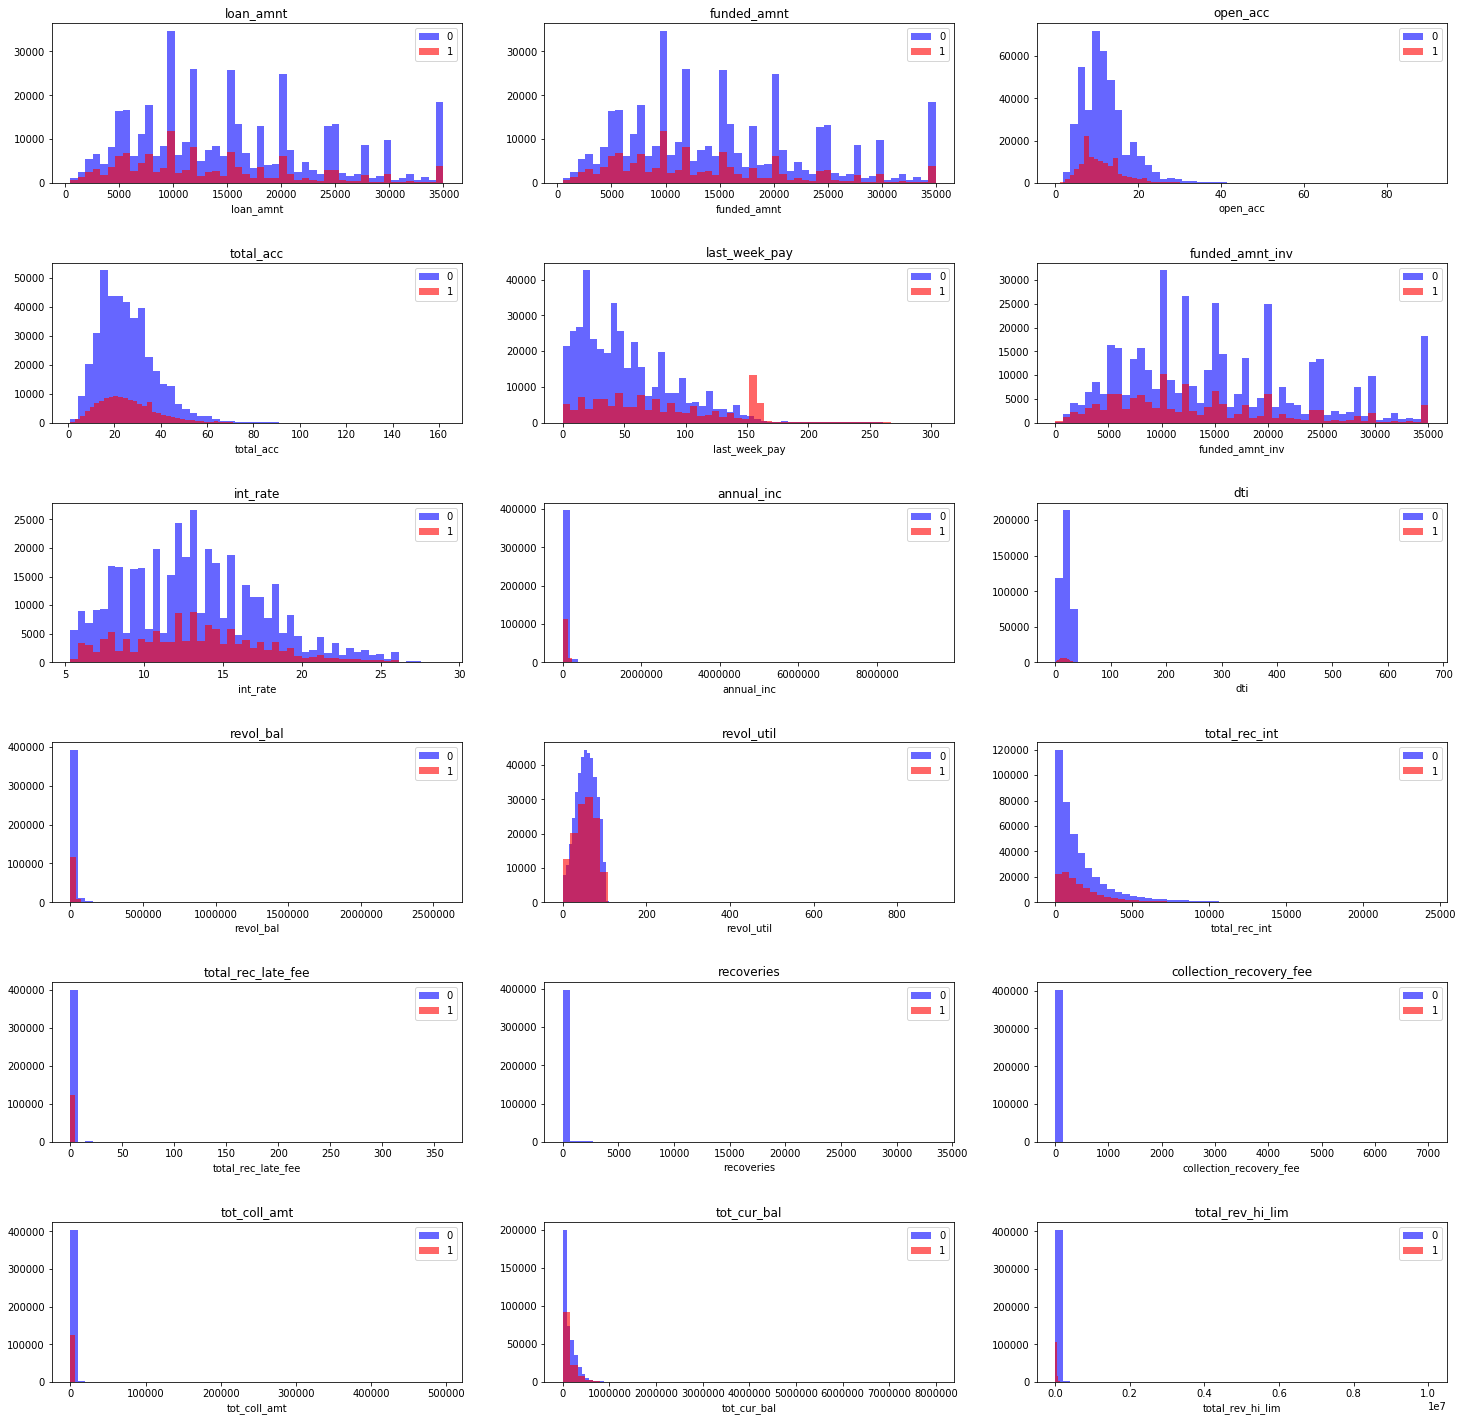

In [282]:
loan_0 = train_data[train_data['loan_status']==0]
loan_1 = train_data[train_data['loan_status']==1]
fig, axes = plt.subplots(6, 3, figsize=(25, 25))
for idx, (col, ax) in enumerate(zip(continuous_features, axes.flatten())):
    sns.distplot(loan_0[col], ax=ax, kde=False, hist_kws={'alpha':0.6, 'color':'blue'}, label='0')
    sns.distplot(loan_1[col], ax=ax, kde=False, hist_kws={'alpha':0.6, 'color':'red'}, label='1')
    ax.set_title(col)
    ax.legend()
    plt.subplots_adjust(wspace=.2, hspace=.5)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

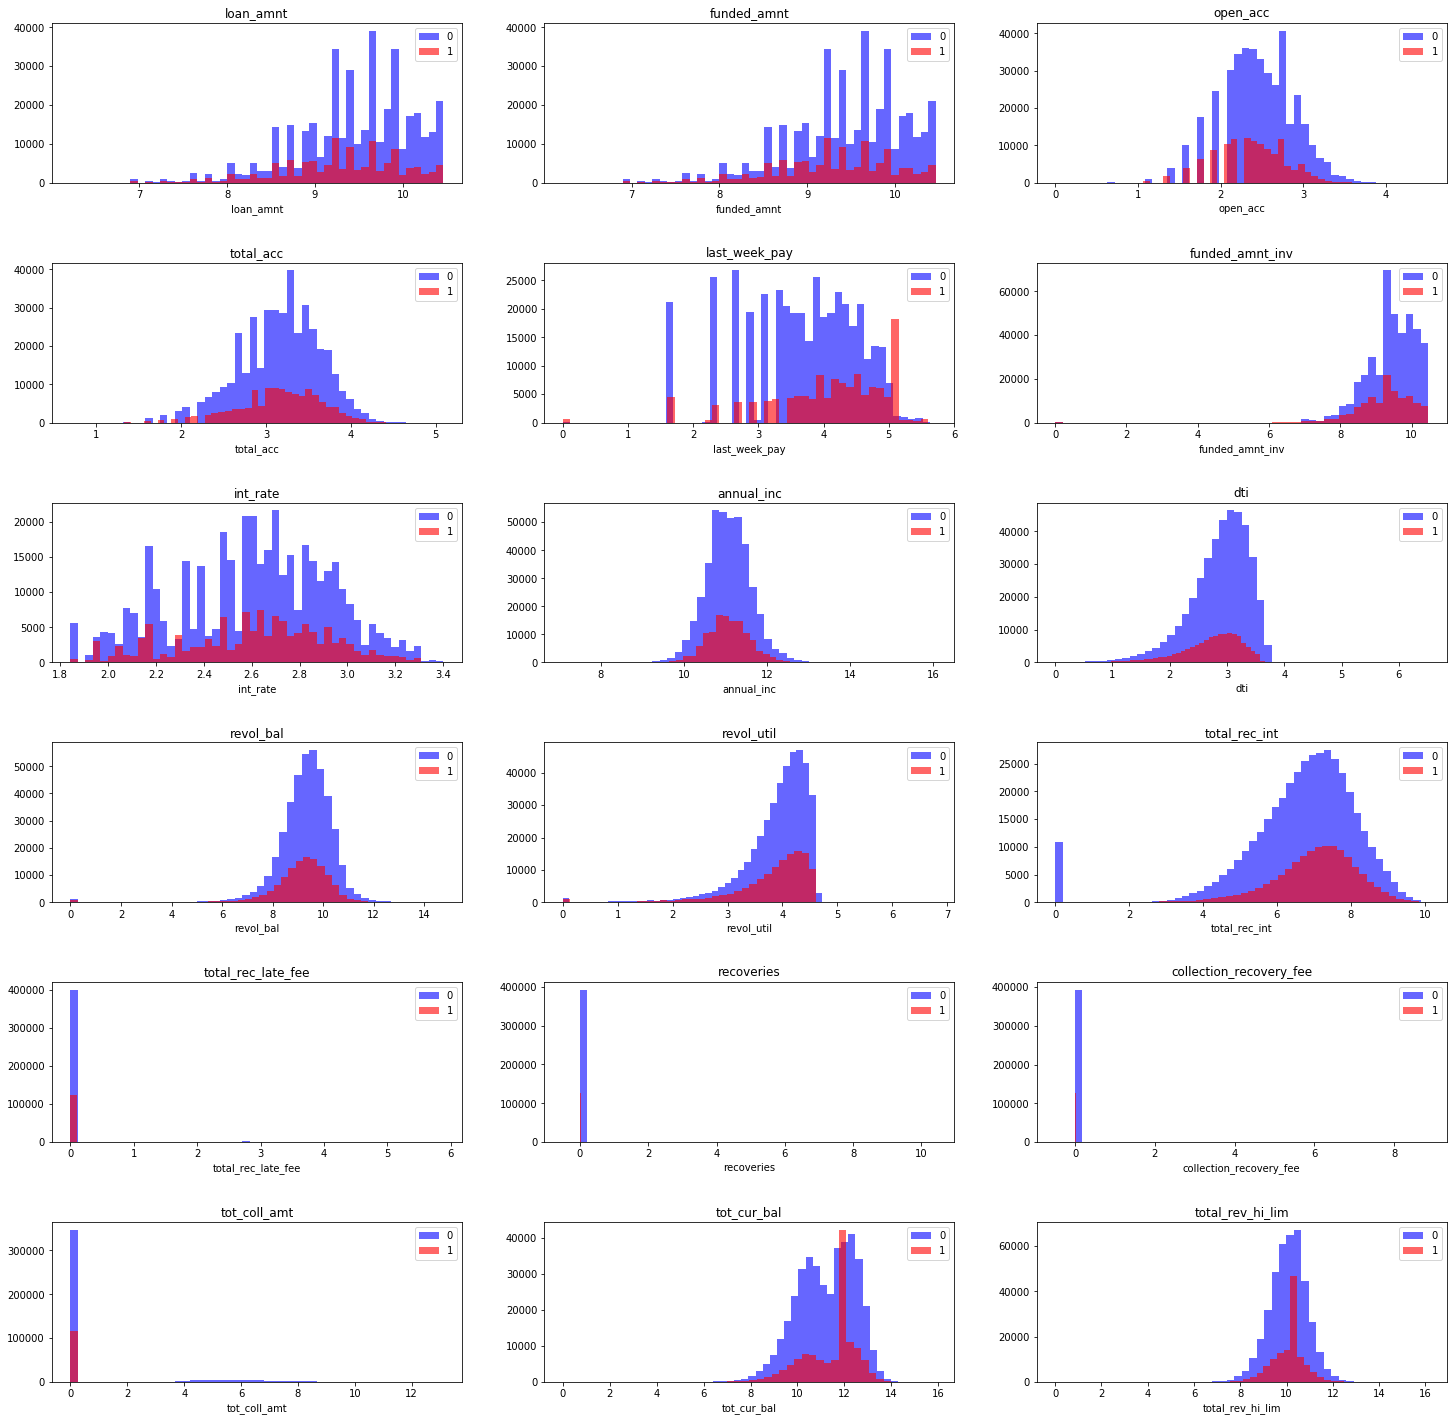

In [283]:
loan_0 = train_data[train_data['loan_status']==0]
loan_1 = train_data[train_data['loan_status']==1]
fig, axes = plt.subplots(6, 3, figsize=(25, 25))
for idx, (col, ax) in enumerate(zip(continuous_features, axes.flatten())):
    sns.distplot(np.log1p(loan_0[col]), ax=ax, kde=False, hist_kws={'alpha':0.6, 'color':'blue'}, label='0')
    sns.distplot(np.log1p(loan_1[col]), ax=ax, kde=False, hist_kws={'alpha':0.6, 'color':'red'}, label='1')
    ax.set_title(col)
    ax.legend()
    plt.subplots_adjust(wspace=.2, hspace=.5)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

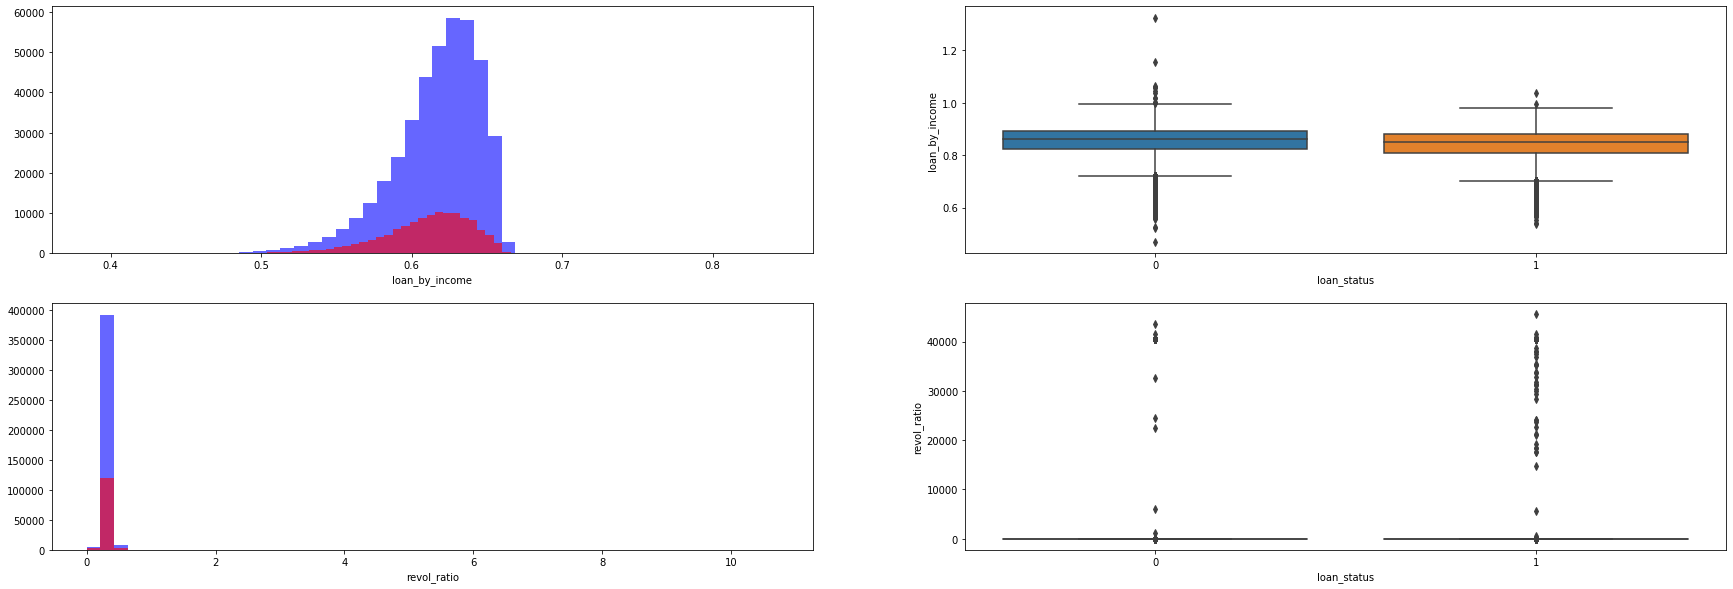

In [288]:
# Adding a new feature

train_data['loan_by_income'] = train_data['loan_amnt']/(train_data['annual_inc']+0.0001)
train_data['revol_ratio'] = train_data['revol_util']/(train_data['revol_bal']+0.0001)

test_data['loan_by_income'] = test_data['loan_amnt']/(test_data['annual_inc']+0.0001)
test_data['revol_ratio'] = test_data['revol_util']/(test_data['revol_bal']+0.0001)

continuous_features.extend(['loan_by_income', 'revol_ratio'])

loan_0 = train_data[train_data['loan_status']==0]
loan_1 = train_data[train_data['loan_status']==1]

fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sns.distplot(np.log1p(loan_0['loan_by_income']), ax=ax[0][0], kde=False, hist_kws={'alpha':0.6, 'color':'blue'}, label='0')
sns.distplot(np.log1p(loan_1['loan_by_income']), ax=ax[0][0], kde=False, hist_kws={'alpha':0.6, 'color':'red'}, label='1')
sns.boxplot(x=target, y='loan_by_income', data=train_data, ax=ax[0][1])

sns.distplot(np.log1p(loan_0['revol_ratio']), ax=ax[1][0], kde=False, hist_kws={'alpha':0.6, 'color':'blue'}, label='0')
sns.distplot(np.log1p(loan_1['revol_ratio']), ax=ax[1][0], kde=False, hist_kws={'alpha':0.6, 'color':'red'}, label='1')
sns.boxplot(x=target, y='revol_ratio', data=train_data, ax=ax[1][1])

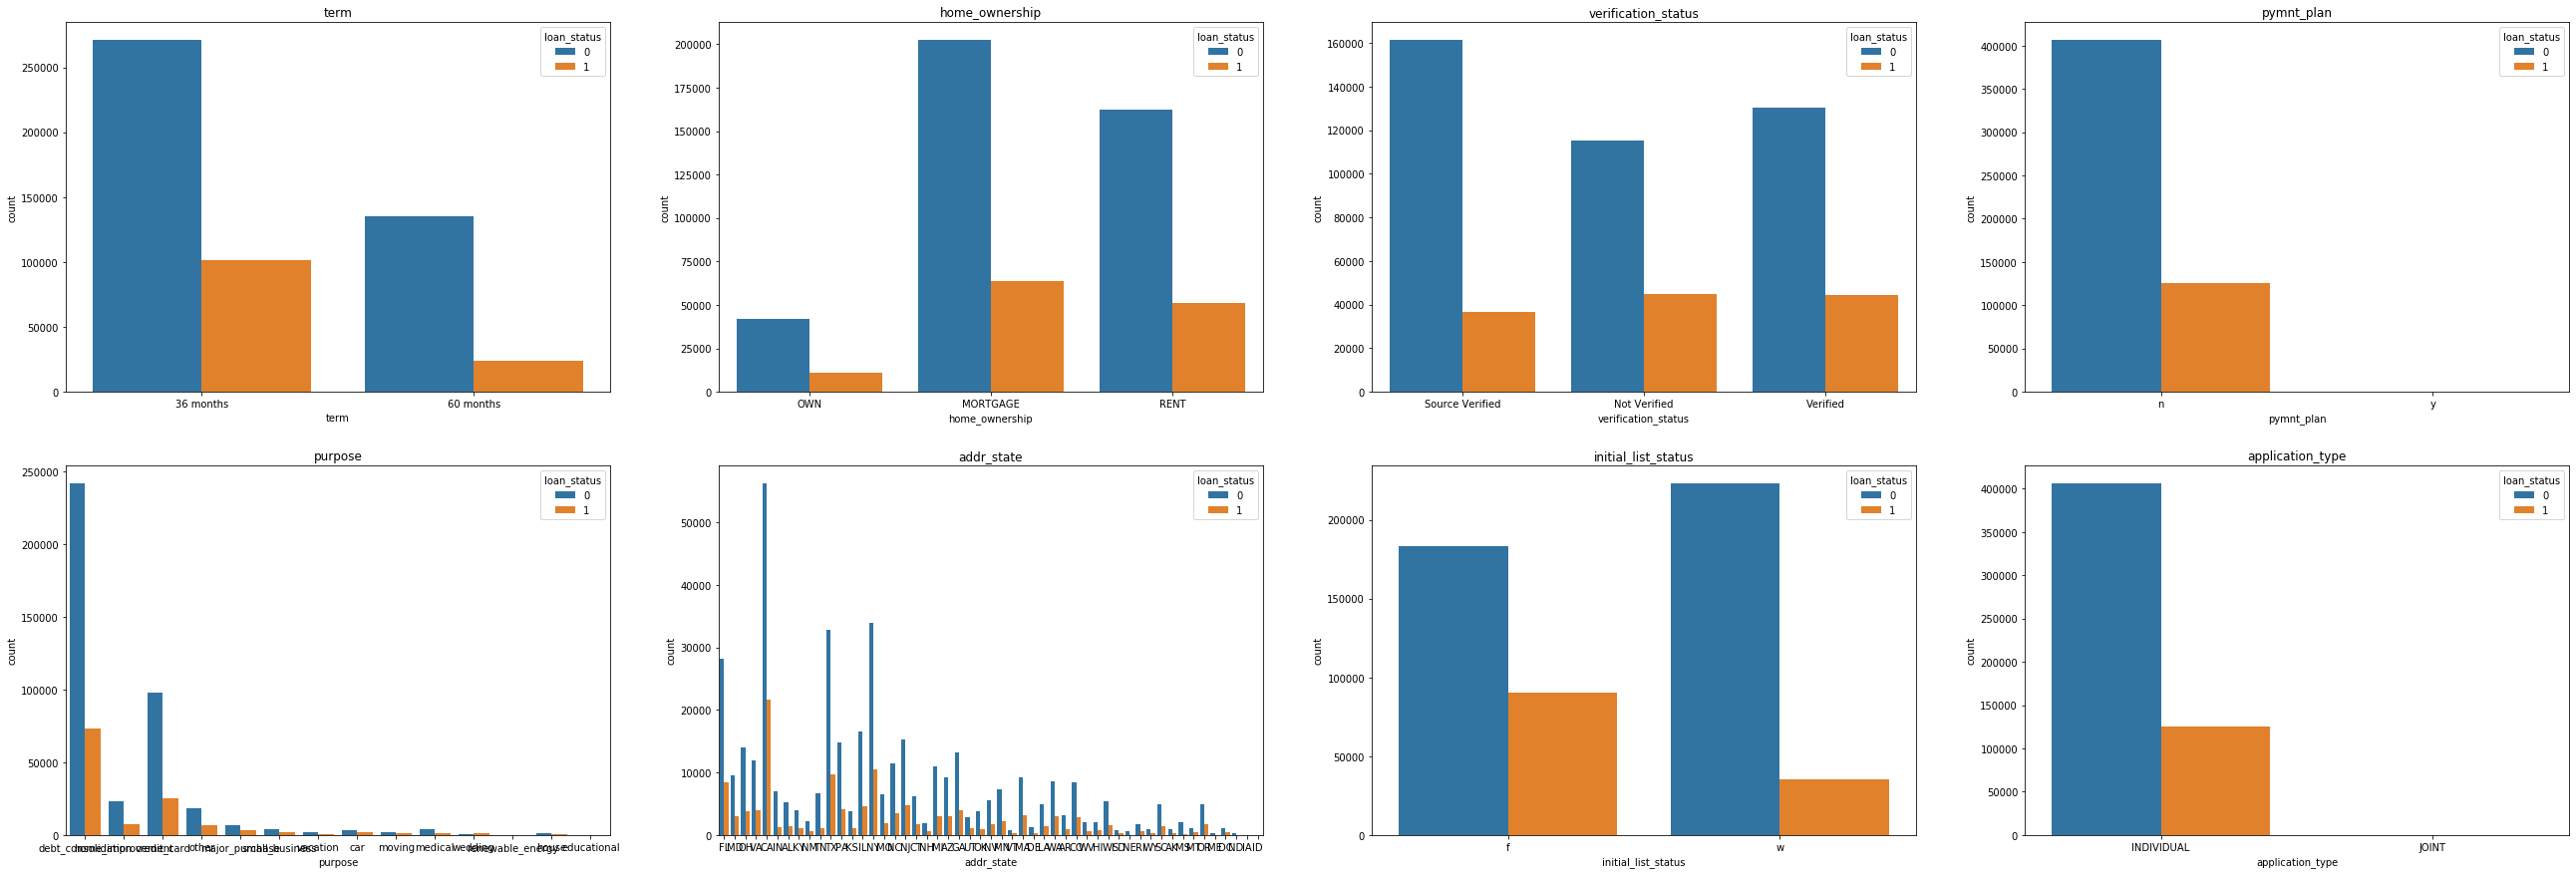

In [285]:
fig, axes = plt.subplots(2, 4, figsize=(45, 15))
for idx, (col, ax) in enumerate(zip(categorical_features, axes.flatten())):
    sns.countplot(col, data=train_data, ax=ax, hue=target)
    ax.set_title(col)
    plt.subplots_adjust(wspace=.2, hspace=.2)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

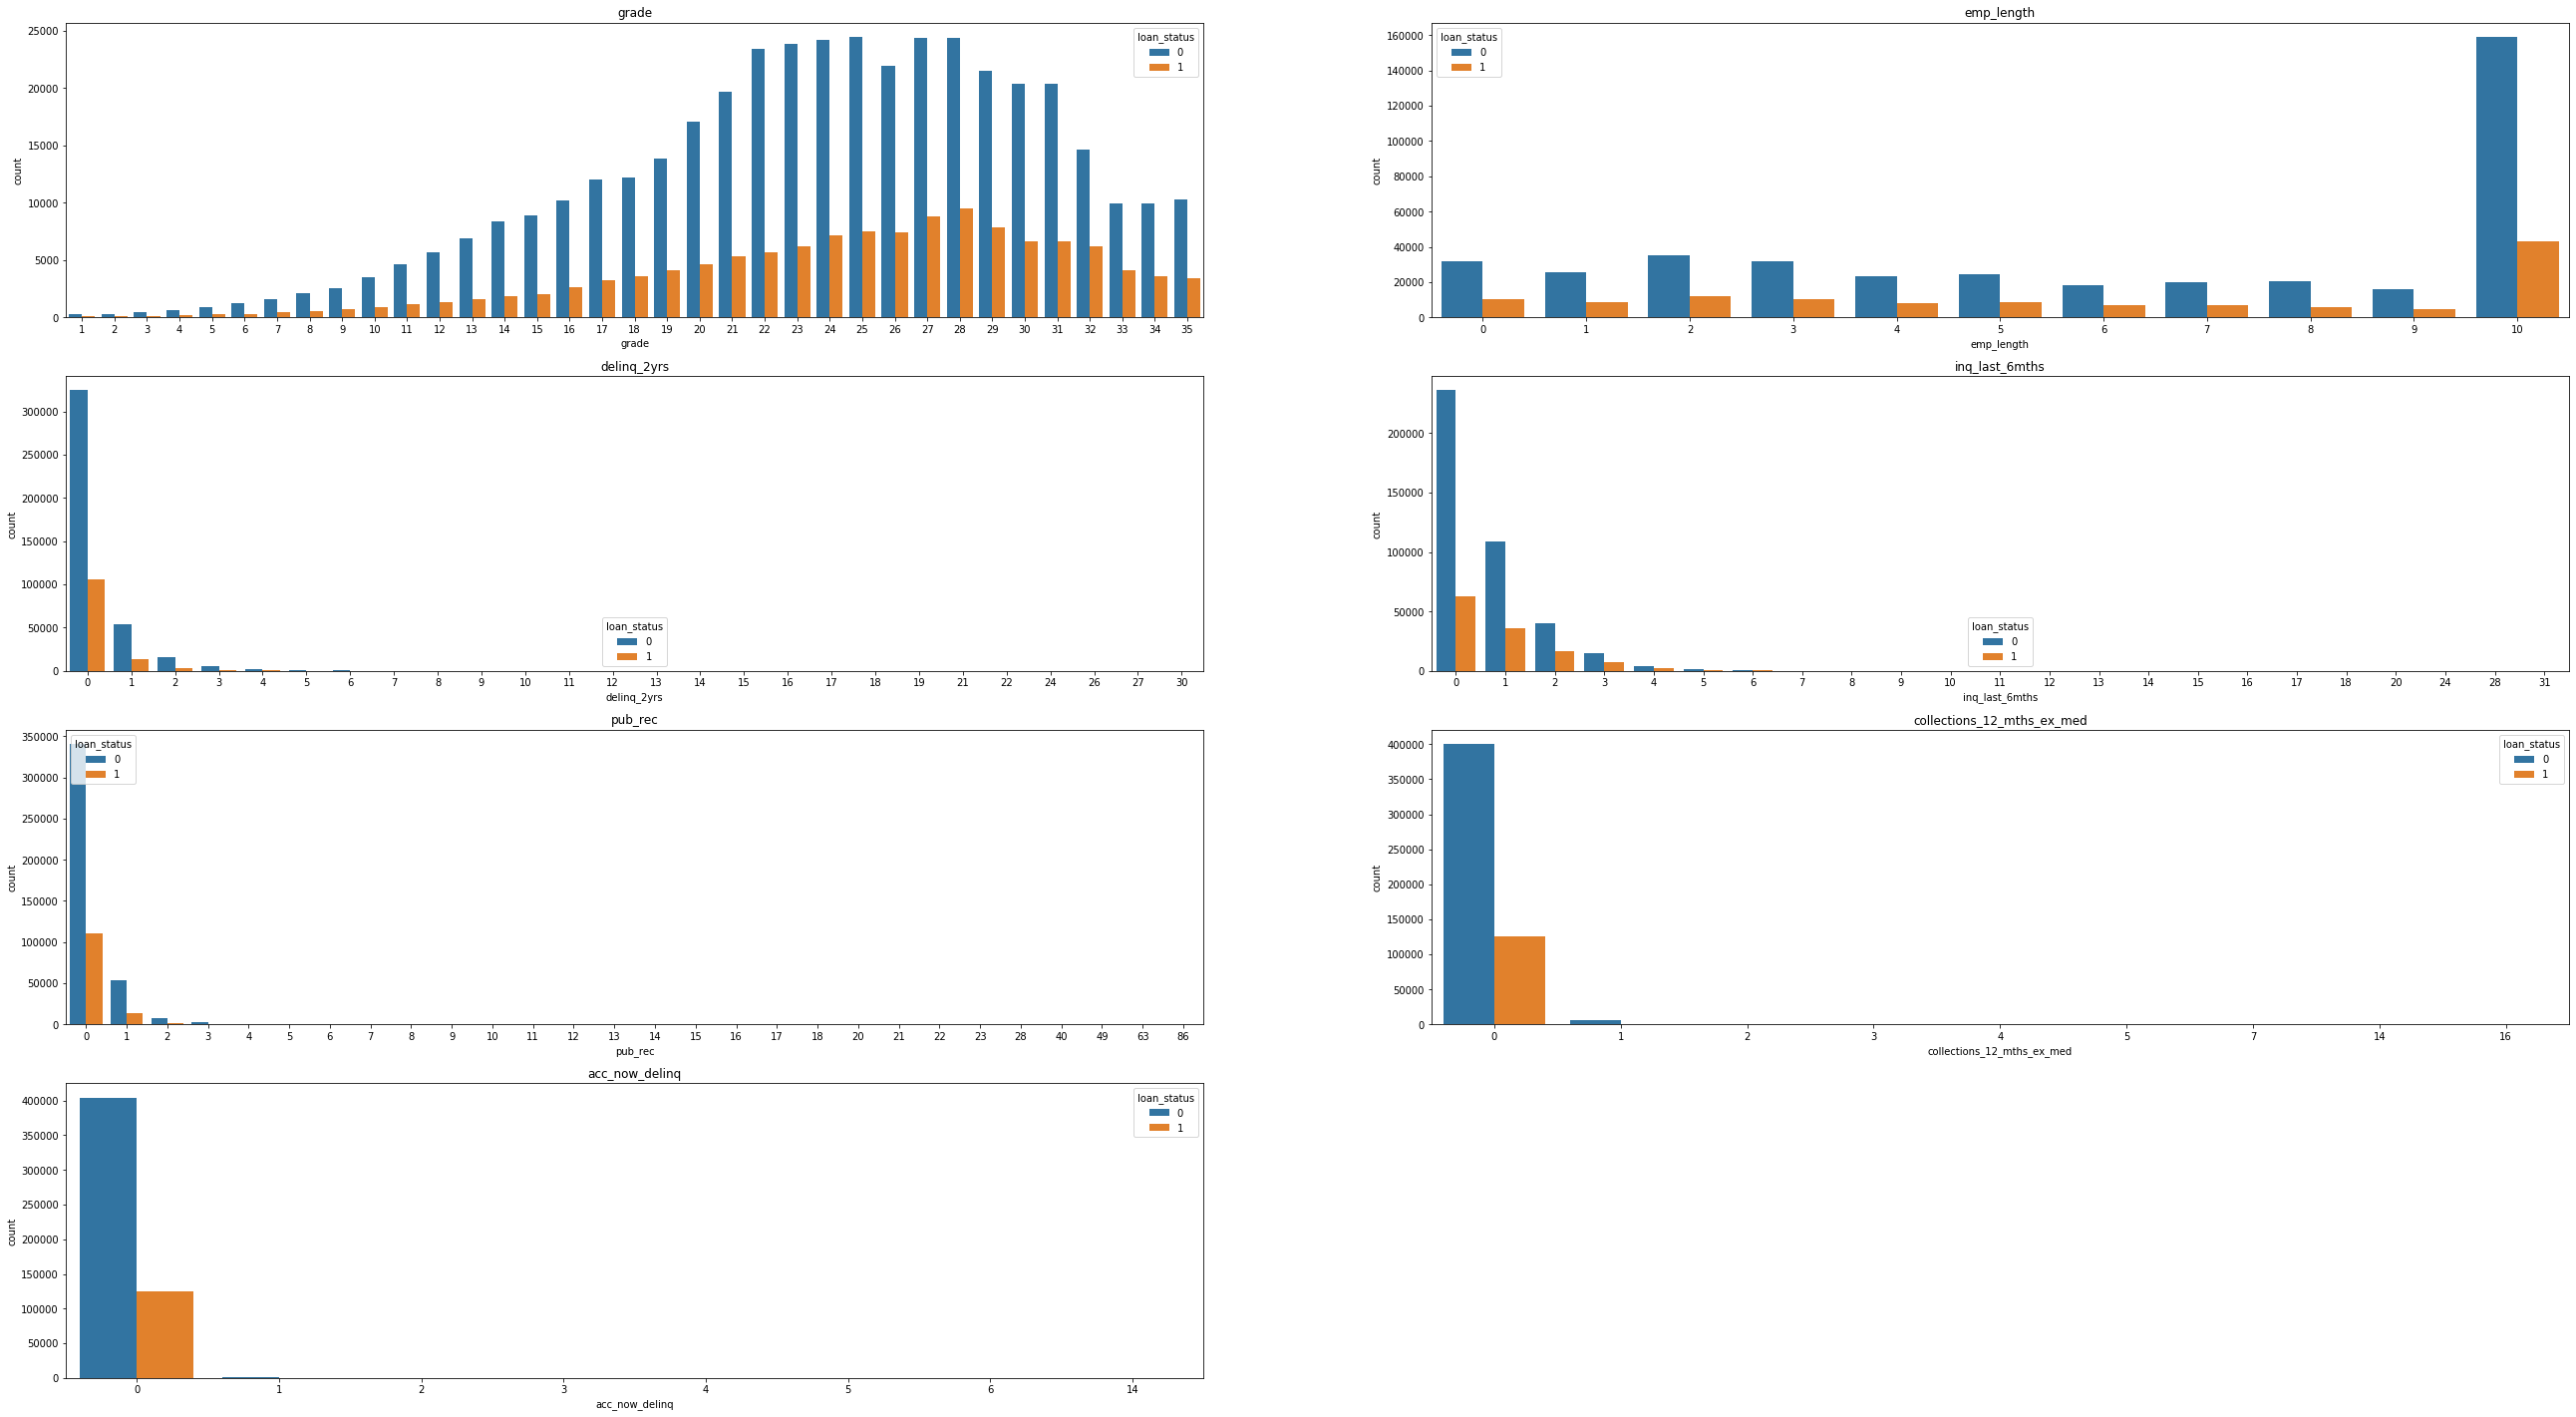

In [286]:
fig, axes = plt.subplots(4, 2, figsize=(45, 25))
for idx, (col, ax) in enumerate(zip(ordinal_features, axes.flatten())):
    sns.countplot(col, data=train_data, ax=ax, hue=target)
    ax.set_title(col)
    plt.subplots_adjust(wspace=.2, hspace=.2)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# Data Preprocessing

In [326]:
# Transforming the data

for col in continuous_features:
    train_data[col] = np.log1p(train_data[col])
    test_data[col] = np.log1p(test_data[col])

In [385]:
train_data = train_data.drop(columns=['addr_state'])
test_data = test_data.drop(columns=['addr_state'])

In [386]:
X = train_data.drop(columns=['loan_status'])
X = pd.get_dummies(X, drop_first=True)
y = train_data['loan_status']

In [387]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [389]:
test_features = pd.get_dummies(test_data, drop_first=True)
test_features = scaler.transform(test_features)

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=51)

# Model Building

In [391]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def print_score(y_true, y_pred):
    print(f"Accuracy Score: {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(y_true, y_pred)}\n")
    print(f"ROC AUC Score: \n {roc_auc_score(y_true, y_pred) :.2f}\n")

In [392]:
from sklearn.ensemble import RandomForestClassifier

In [394]:
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

In [395]:
print('Training Result:')
print_score(y_train, y_train_pred)

print('-------------')

print('Testing Result:')
print_score(y_test, y_test_pred)

Training Result:
Accuracy Score: 89.46%
Confusion Matrix: 
 [[283430   1190]
 [ 38097  49982]]

ROC AUC Score: 
 0.78

-------------
Testing Result:
Accuracy Score: 83.81%
Confusion Matrix: 
 [[121105    876]
 [ 24977  12771]]

ROC AUC Score: 
 0.67



In [409]:
len(rf_clf.feature_importances_)

48

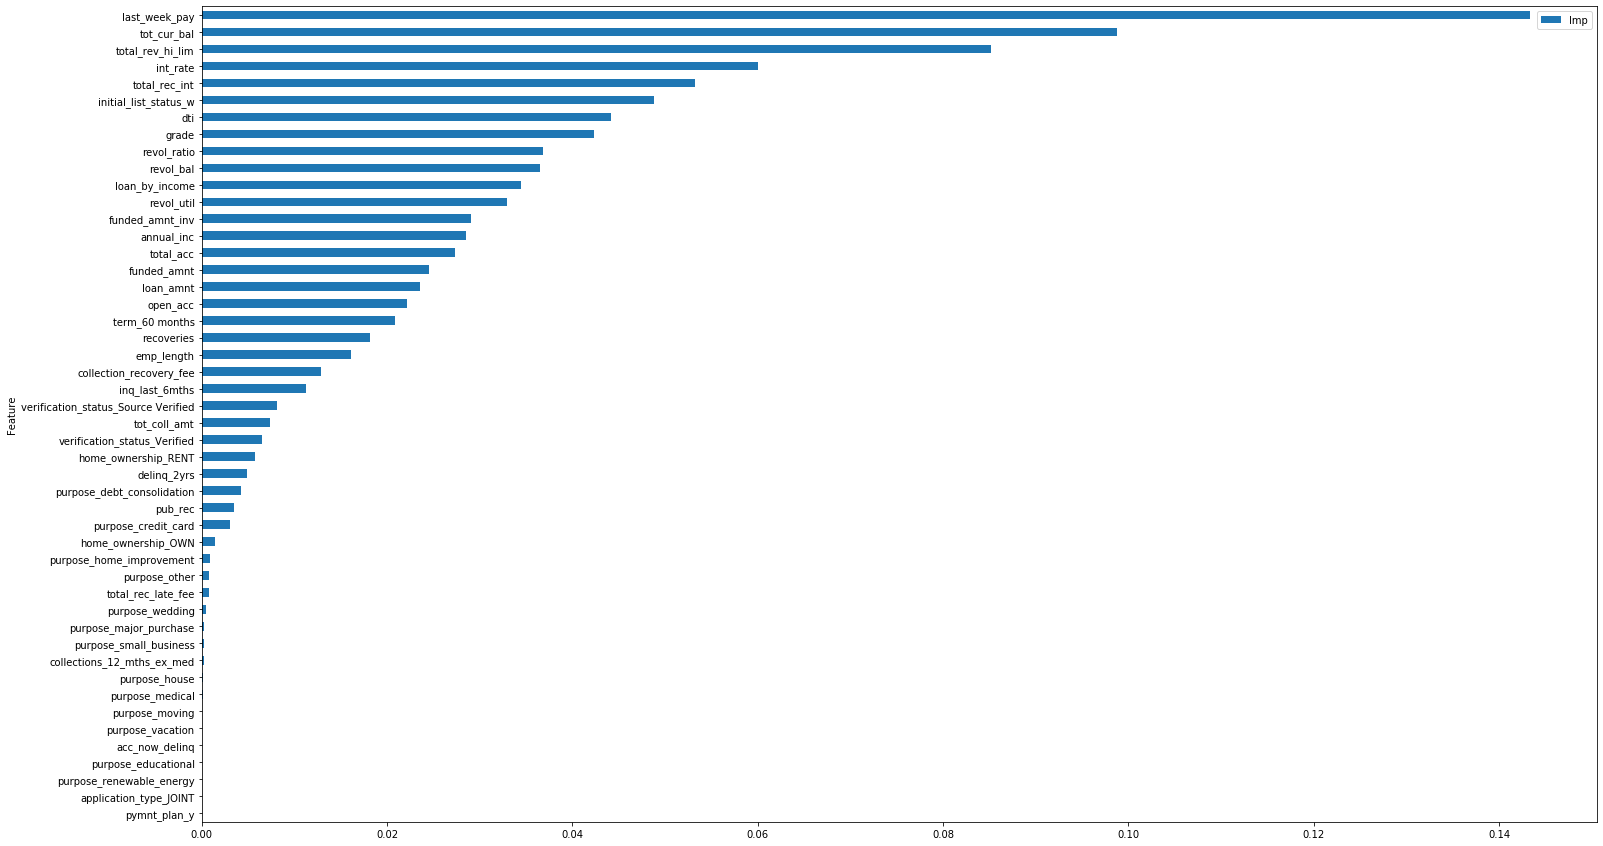

In [418]:
features = pd.get_dummies(train_data, drop_first=True).drop(columns=['loan_status']).columns
feature_imp = pd.DataFrame({'Feature':features, 'Imp':rf_clf.feature_importances_})
feature_imp = feature_imp.sort_values('Imp')
feature_imp.plot.barh('Feature', 'Imp', figsize=(25,15))

In [396]:
predictions = rf_clf.predict(test_features)

In [400]:
df = pd.read_csv('ML_Artivatic_dataset/test_indessa.csv')
df = df['member_id']

In [402]:
final_df = pd.DataFrame({'member_id': df, 'loan_status': predictions})
final_df.head()

,member_id,loan_status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0


In [404]:
final_df.to_csv('predictions.csv', index=False)